Kelompok 3
1. Fadlur Rohman – 21060124420015
2. Melissa Rahmawati Yusuf – 21060124420018
3. Zakky Mizanulfikri Ash Sodiq – 21060124420021
4. Fauziyah Wafa’Abdillah – 21060124420023

In [ ]:
# Memanggil library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Memanggil dataset

# dataset_drug = pd.read_csv('a_dataset_drug.csv')
dataset_drug = pd.read_csv('https://raw.githubusercontent.com/Mas-Zakky/3Dataset_NaiveBayesian-ANN/refs/heads/main/a_dataset_drug.csv')
print("Dataset drug")
dataset_drug.info()
print()

# dataset_wine = pd.read_csv('ALKOHOL FIX.csv', delimiter=';')
dataset_wine = pd.read_csv('https://raw.githubusercontent.com/Mas-Zakky/3Dataset_NaiveBayesian-ANN/refs/heads/main/ALKOHOL%20FIX.csv', delimiter=';')
print("Dataset wine")
dataset_wine.info()
print()

# dataset_diabetes = pd.read_csv('diabetes.csv')
dataset_diabetes = pd.read_csv('https://raw.githubusercontent.com/Mas-Zakky/3Dataset_NaiveBayesian-ANN/refs/heads/main/diabetes.csv')
print("Dataset diabetes")
dataset_diabetes.info()

Dataset drug
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB

Dataset wine
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   fr

In [27]:
# Target variable
TF_drug = ['Age', 'Na_to_K', 'BP']
TF_wine = ['volatile acidity', 'sulphates', 'alcohol']
TF_diabetes = ['Pregnancies', 'Glucose', 'BloodPressure']

Fitur_drug = dataset_drug[TF_drug].copy()
Label_drug = dataset_drug['Drug'].copy()

Fitur_wine = dataset_wine[TF_wine].copy()
Label_wine = dataset_wine['quality'].copy()

Fitur_diabetes = dataset_diabetes[TF_diabetes].copy()
Label_diabetes = dataset_diabetes['Outcome'].copy()

In [28]:
def Conver_Encoder(data):
    from sklearn.preprocessing import LabelEncoder
    return LabelEncoder().fit_transform(data)

# Fungsi check variable. bila object maka di ganti
def Check_Object(data):
    from sklearn.preprocessing import LabelEncoder
    for a in data:
        if data[a].dtype != 'object': continue
        data[a] = Conver_Encoder(data[a])
    return data

Fitur_drug = Check_Object(Fitur_drug)
Fitur_wine = Check_Object(Fitur_wine)
Fitur_diabetes = Check_Object(Fitur_diabetes)


In [29]:
# Fungsi Klasifikasi dan tampilkan
def Classifier(Fistur, label, name, fistur_input):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.neural_network import MLPClassifier

    X = Fistur.values
    y = Conver_Encoder(label)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # /////////////////////////// Bayessian
    classifier = GaussianNB()
    classifier.fit(X_train.copy(), y_train.copy())

    nb_predict = classifier.predict(X_test)
    nb_predict_accuracy  = accuracy_score(y_test, nb_predict)


    # /////////////////////////// ANN
    mlp_model = MLPClassifier(max_iter=1000)
    mlp_model.fit(X_train.copy(), y_train.copy())

    ann_predict = mlp_model.predict(X_test)
    ann_predict_accuracy = accuracy_score(y_test, ann_predict)

    # /////////////////////////// Hasil Akurasi
    print()
    print('Nama Dataset = ', name)
    print('Akurasi Score BY  = ', nb_predict_accuracy)
    print('Akurasi Score ANN = ', ann_predict_accuracy)

    from sklearn import metrics
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(20, 6))

    data_text = fig.add_subplot(1, 3, 1)
    data_text.axis('off')
    data_text_isi = '\n'.join((
      f'Nama Dataset : {name}',
      f'Fistur input :' + str(fistur_input),
      f'',
      f'Akurasi NB   : {nb_predict_accuracy*100:.2f} %',
      f'Akurasi ANN  : {ann_predict_accuracy*100:.2f} %'
    ))
    data_text.text(0.05, 0.9, data_text_isi, fontsize=14, va='top', family='monospace')

    nb_ax_cm = fig.add_subplot(1, 3, 2)
    nb_confusion_matrix = metrics.confusion_matrix(y_test, nb_predict)
    nb_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = nb_confusion_matrix, display_labels= np.unique(label))
    nb_cm_display.plot(ax=nb_ax_cm)
    nb_ax_cm.tick_params(axis='x', labelsize=7)
    nb_ax_cm.set_title('Confusion Matrix Naive Bayes')

    ann_ax_cm = fig.add_subplot(1, 3, 3)
    ann_confusion_matrix = metrics.confusion_matrix(y_test, ann_predict)
    ann_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = ann_confusion_matrix, display_labels= np.unique(label))
    ann_cm_display.plot(ax=ann_ax_cm)
    ann_ax_cm.tick_params(axis='x', labelsize=7)
    ann_ax_cm.set_title('Confusion Matrix ANN (MLP, Multi-layer Perceptron)')

    # print("Naive Bayes", nb_confusion_matrix)
    # print()
    # print("ANN", ann_confusion_matrix)
    # print()

    plt.tight_layout()
    plt.show()


Nama Dataset =  Dataset Wine
Akurasi Score BY  =  0.725
Akurasi Score ANN =  0.73125


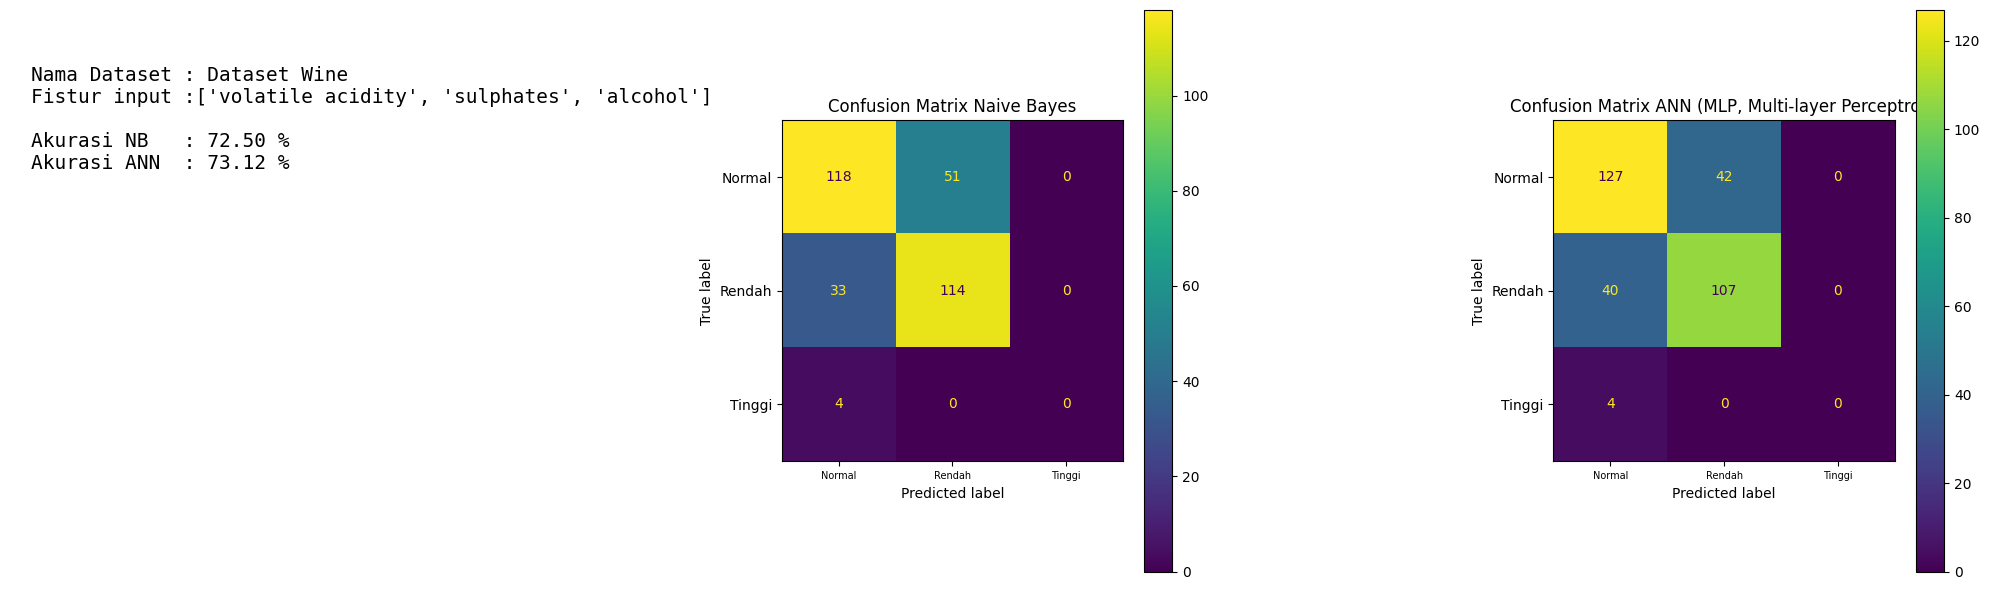


Nama Dataset =  Dataset Drug
Akurasi Score BY  =  0.95
Akurasi Score ANN =  0.975


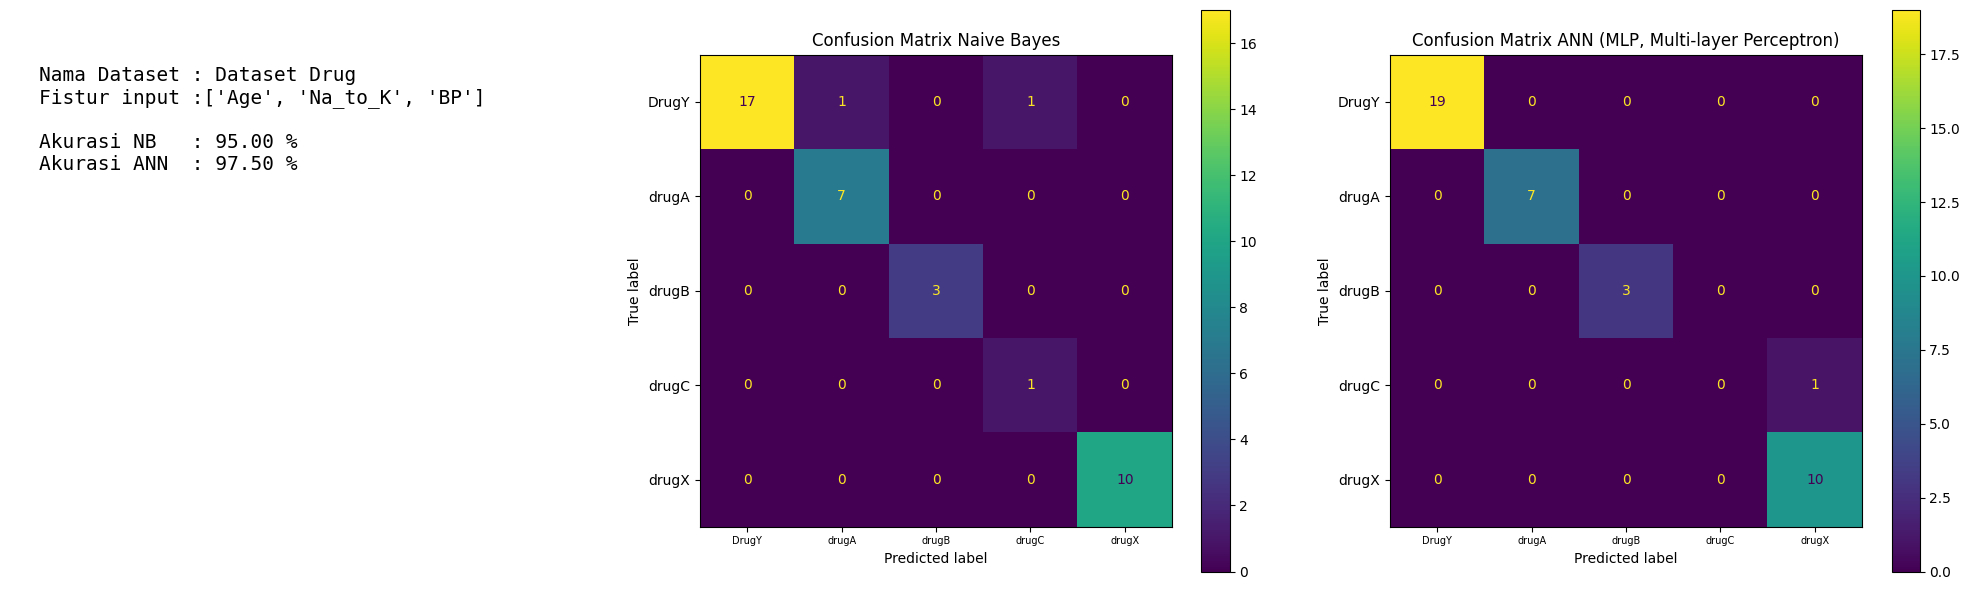


Nama Dataset =  Dataset Diabetes
Akurasi Score BY  =  0.7337662337662337
Akurasi Score ANN =  0.7402597402597403


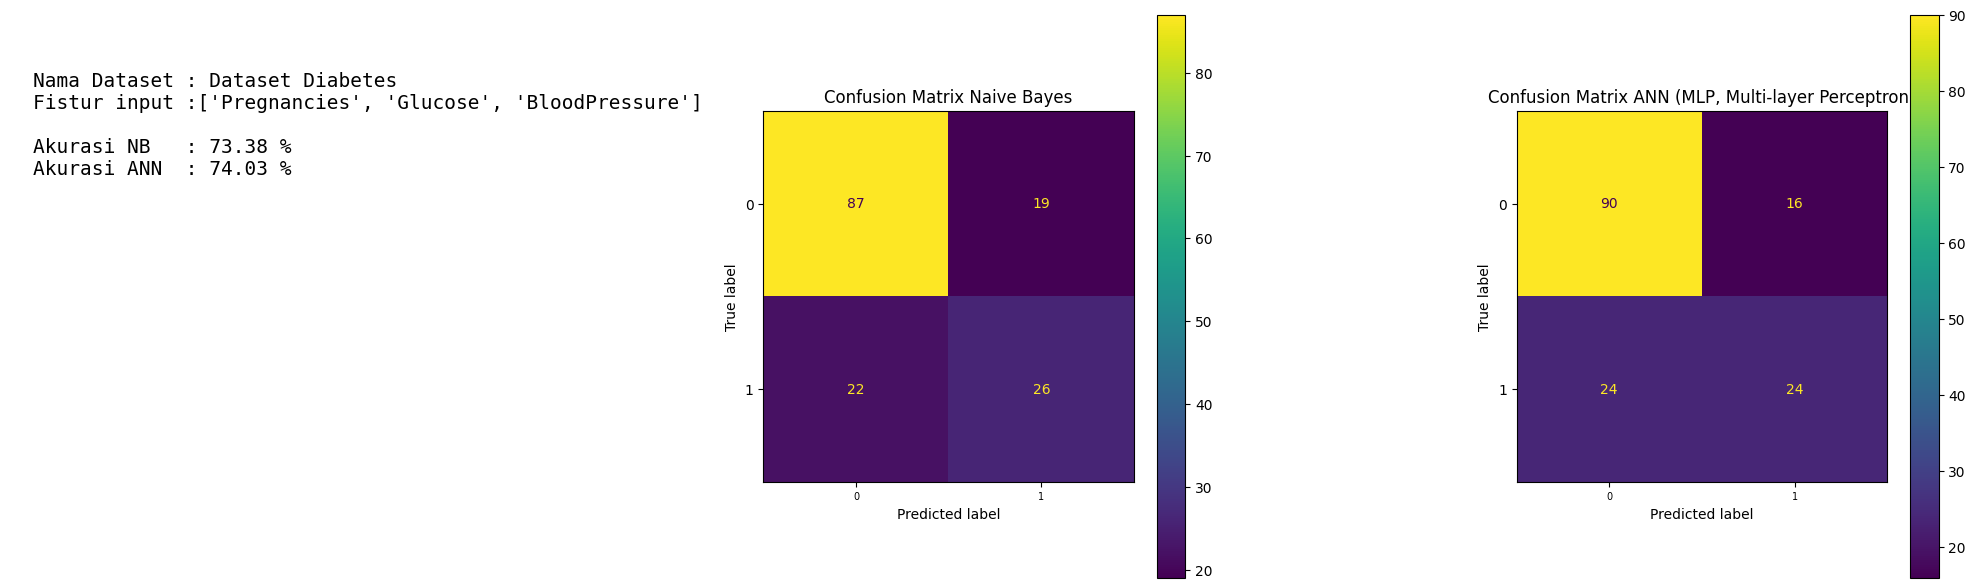

In [ ]:
# Klasifikasi masing-masing dataset
Classifier(Fitur_wine, Label_wine, "Dataset Wine", TF_wine)
Classifier(Fitur_drug, Label_drug, "Dataset Drug", TF_drug)
Classifier(Fitur_diabetes, Label_diabetes, "Dataset Diabetes", TF_diabetes)